In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_curve, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, auc
import joblib
import warnings
warnings.filterwarnings('ignore')

In [ ]:
file_path = r'data\ObesityDataSet.csv'
df = pd.read_csv(file_path)
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [97]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [98]:
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [99]:
df[df.duplicated()]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
98,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
106,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
174,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
179,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
184,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
209,Female,22.0,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
309,Female,16.0,1.66,58.0,no,no,2.0,1.0,Sometimes,no,1.0,no,0.0,1.0,no,Walking,Normal_Weight
460,Female,18.0,1.62,55.0,yes,yes,2.0,3.0,Frequently,no,1.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight
467,Male,22.0,1.74,75.0,yes,yes,3.0,3.0,Frequently,no,1.0,no,1.0,0.0,no,Automobile,Normal_Weight
496,Male,18.0,1.72,53.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight


In [100]:
df.drop_duplicates(inplace=True)

In [101]:
binary_map = {
    'Male':1,
    'Female':0,
    'yes':1,
    'no':0,
    
}

ordinal_map = {
    'no': 0,
    'Sometimes': 1,
    'Frequently': 2,
    'Always': 3
}

In [102]:
binary_columns = ['family_history_with_overweight','Gender','FAVC','SCC','SMOKE']
ordinal_columns = ['CALC','CAEC']
numeric_columns = ['TUE','FAF','NCP','CH2O','FCVC','Weight','Height','Age']
columns_to_round = ['FCVC','NCP','CH2O','FAF','TUE']

for col in binary_columns:
    df[col] = df[col].map(binary_map)

for col in ordinal_columns:
    df[col] = df[col].map(ordinal_map)

for col in columns_to_round:
    df[col] = df[col].round().astype(int)

df = pd.get_dummies(df, columns=['MTRANS'], prefix='MTRANS')

In [103]:
df['CH2O'].value_counts()

CH2O
2    1107
3     502
1     478
Name: count, dtype: int64

### 🎯 Target Variable: `NObeyesdad`

This column represents the weight category of an individual. It is a **multi-class classification target** with the following encoded labels:

| Label | Class Name             |
|-------|------------------------|
| 0     | Insufficient_Weight    |
| 1     | Normal_Weight          |
| 2     | Obesity_Type_I         |
| 3     | Obesity_Type_II        |
| 4     | Obesity_Type_III       |
| 5     | Overweight_Level_I     |
| 6     | Overweight_Level_II    |

> These encoded labels are used for training classification models.

📌 **Note**: You can retrieve the original labels after encoding using `LabelEncoder().inverse_transform()`.


In [104]:
le = LabelEncoder()
df['NObeyesdad_encoded'] = le.fit_transform(df['NObeyesdad'])

In [105]:
df.drop(['NObeyesdad'], axis=1,inplace=True)

In [106]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_encoded
0,0,21.000000,1.620000,64.000000,1,0,2,3,1,0,...,0,0,1,0,False,False,False,True,False,1
1,0,21.000000,1.520000,56.000000,1,0,3,3,1,1,...,1,3,0,1,False,False,False,True,False,1
2,1,23.000000,1.800000,77.000000,1,0,2,3,1,0,...,0,2,1,2,False,False,False,True,False,1
3,1,27.000000,1.800000,87.000000,0,0,3,3,1,0,...,0,2,0,2,False,False,False,False,True,5
4,1,22.000000,1.780000,89.800000,0,0,2,1,1,0,...,0,0,0,1,False,False,False,True,False,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3,3,1,0,...,0,2,1,1,False,False,False,True,False,4
2107,0,21.982942,1.748584,133.742943,1,1,3,3,1,0,...,0,1,1,1,False,False,False,True,False,4
2108,0,22.524036,1.752206,133.689352,1,1,3,3,1,0,...,0,1,1,1,False,False,False,True,False,4
2109,0,24.361936,1.739450,133.346641,1,1,3,3,1,0,...,0,1,1,1,False,False,False,True,False,4


##### detecting outliers

In [107]:
z_scores = df[numeric_columns].apply(zscore)
outliers = (abs(z_scores) > 3).any(axis=1)
df_cleaned = df[~outliers]

In [108]:
df_cleaned

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_encoded
0,0,21.000000,1.620000,64.000000,1,0,2,3,1,0,...,0,0,1,0,False,False,False,True,False,1
1,0,21.000000,1.520000,56.000000,1,0,3,3,1,1,...,1,3,0,1,False,False,False,True,False,1
2,1,23.000000,1.800000,77.000000,1,0,2,3,1,0,...,0,2,1,2,False,False,False,True,False,1
3,1,27.000000,1.800000,87.000000,0,0,3,3,1,0,...,0,2,0,2,False,False,False,False,True,5
4,1,22.000000,1.780000,89.800000,0,0,2,1,1,0,...,0,0,0,1,False,False,False,True,False,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3,3,1,0,...,0,2,1,1,False,False,False,True,False,4
2107,0,21.982942,1.748584,133.742943,1,1,3,3,1,0,...,0,1,1,1,False,False,False,True,False,4
2108,0,22.524036,1.752206,133.689352,1,1,3,3,1,0,...,0,1,1,1,False,False,False,True,False,4
2109,0,24.361936,1.739450,133.346641,1,1,3,3,1,0,...,0,1,1,1,False,False,False,True,False,4


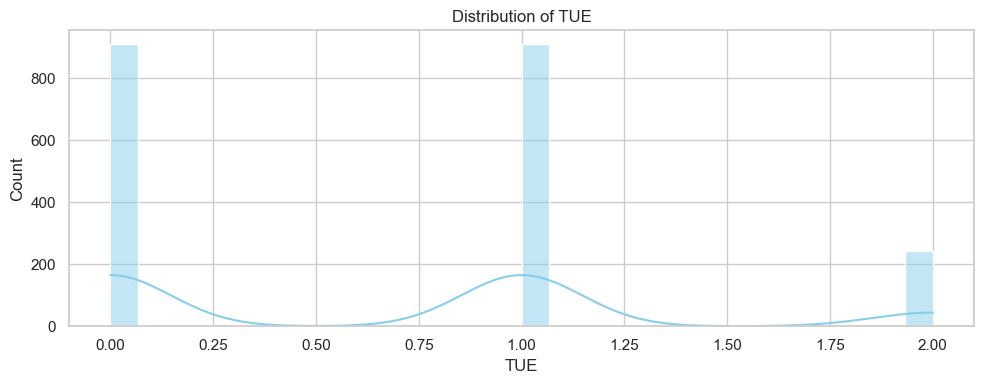

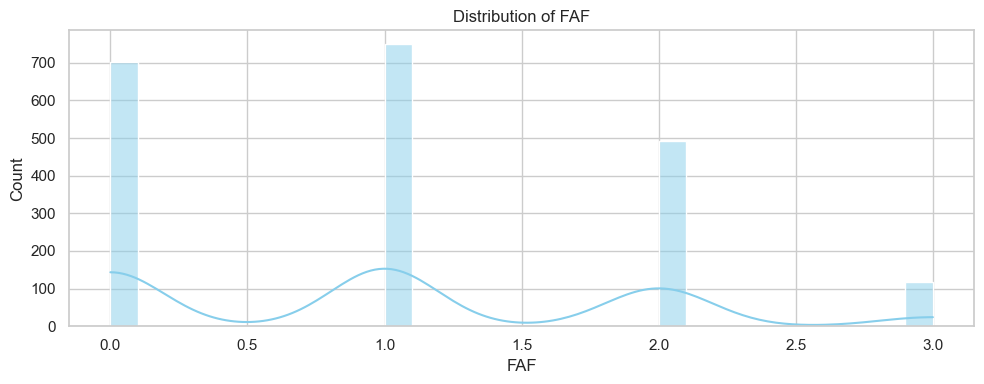

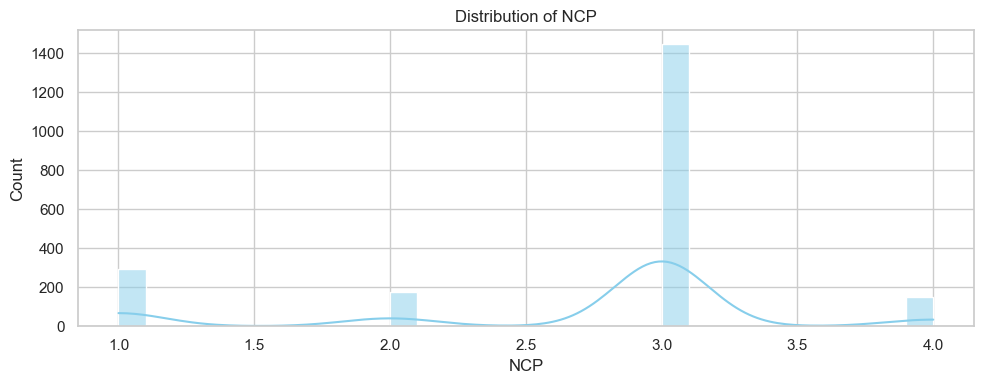

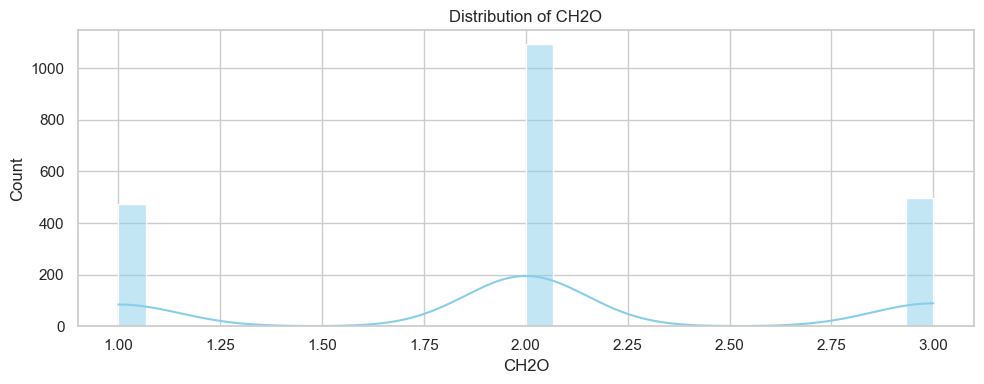

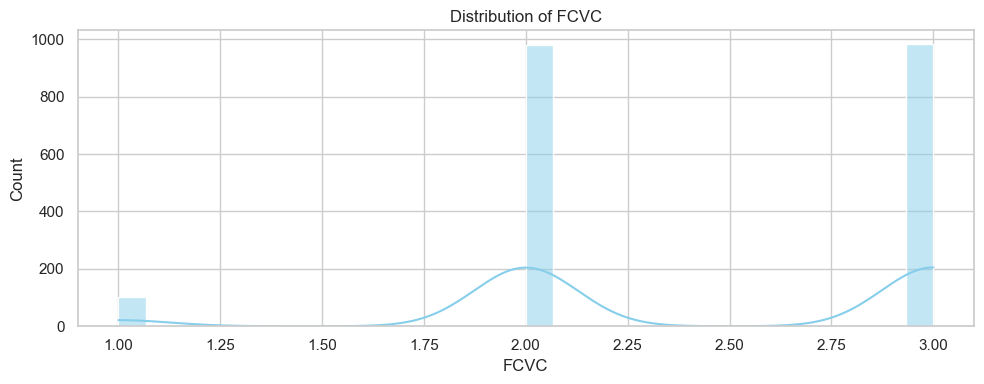

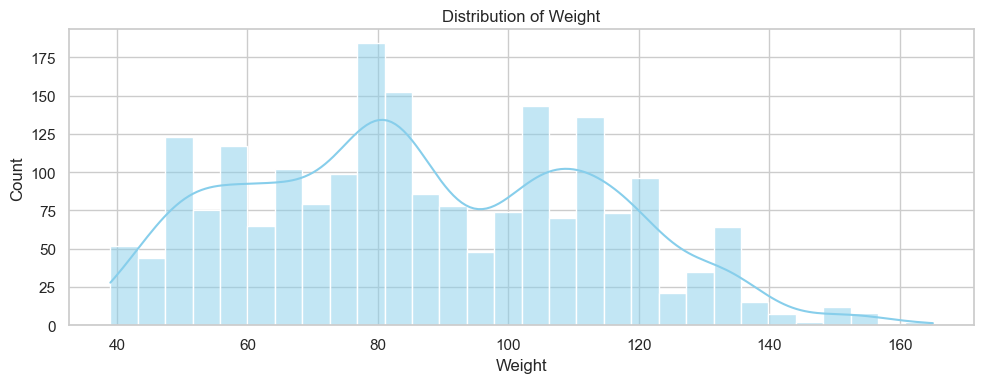

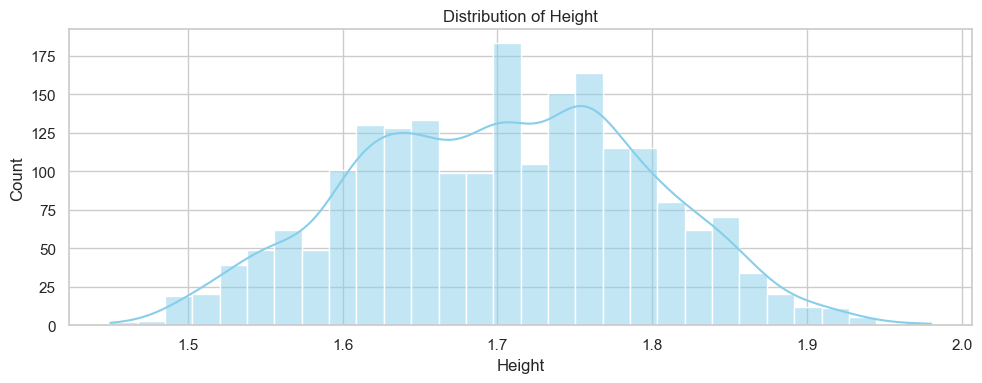

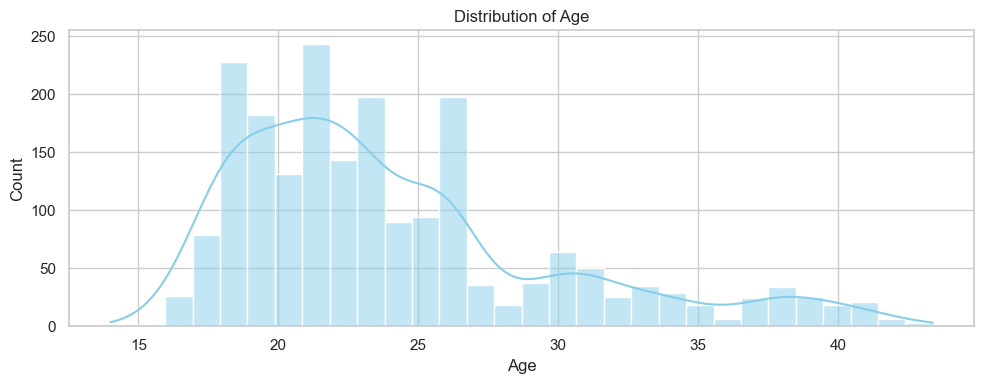

In [109]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 4)

for col in numeric_columns:

    # Histogram
    sns.histplot(df_cleaned[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')

    plt.tight_layout()
    plt.show()

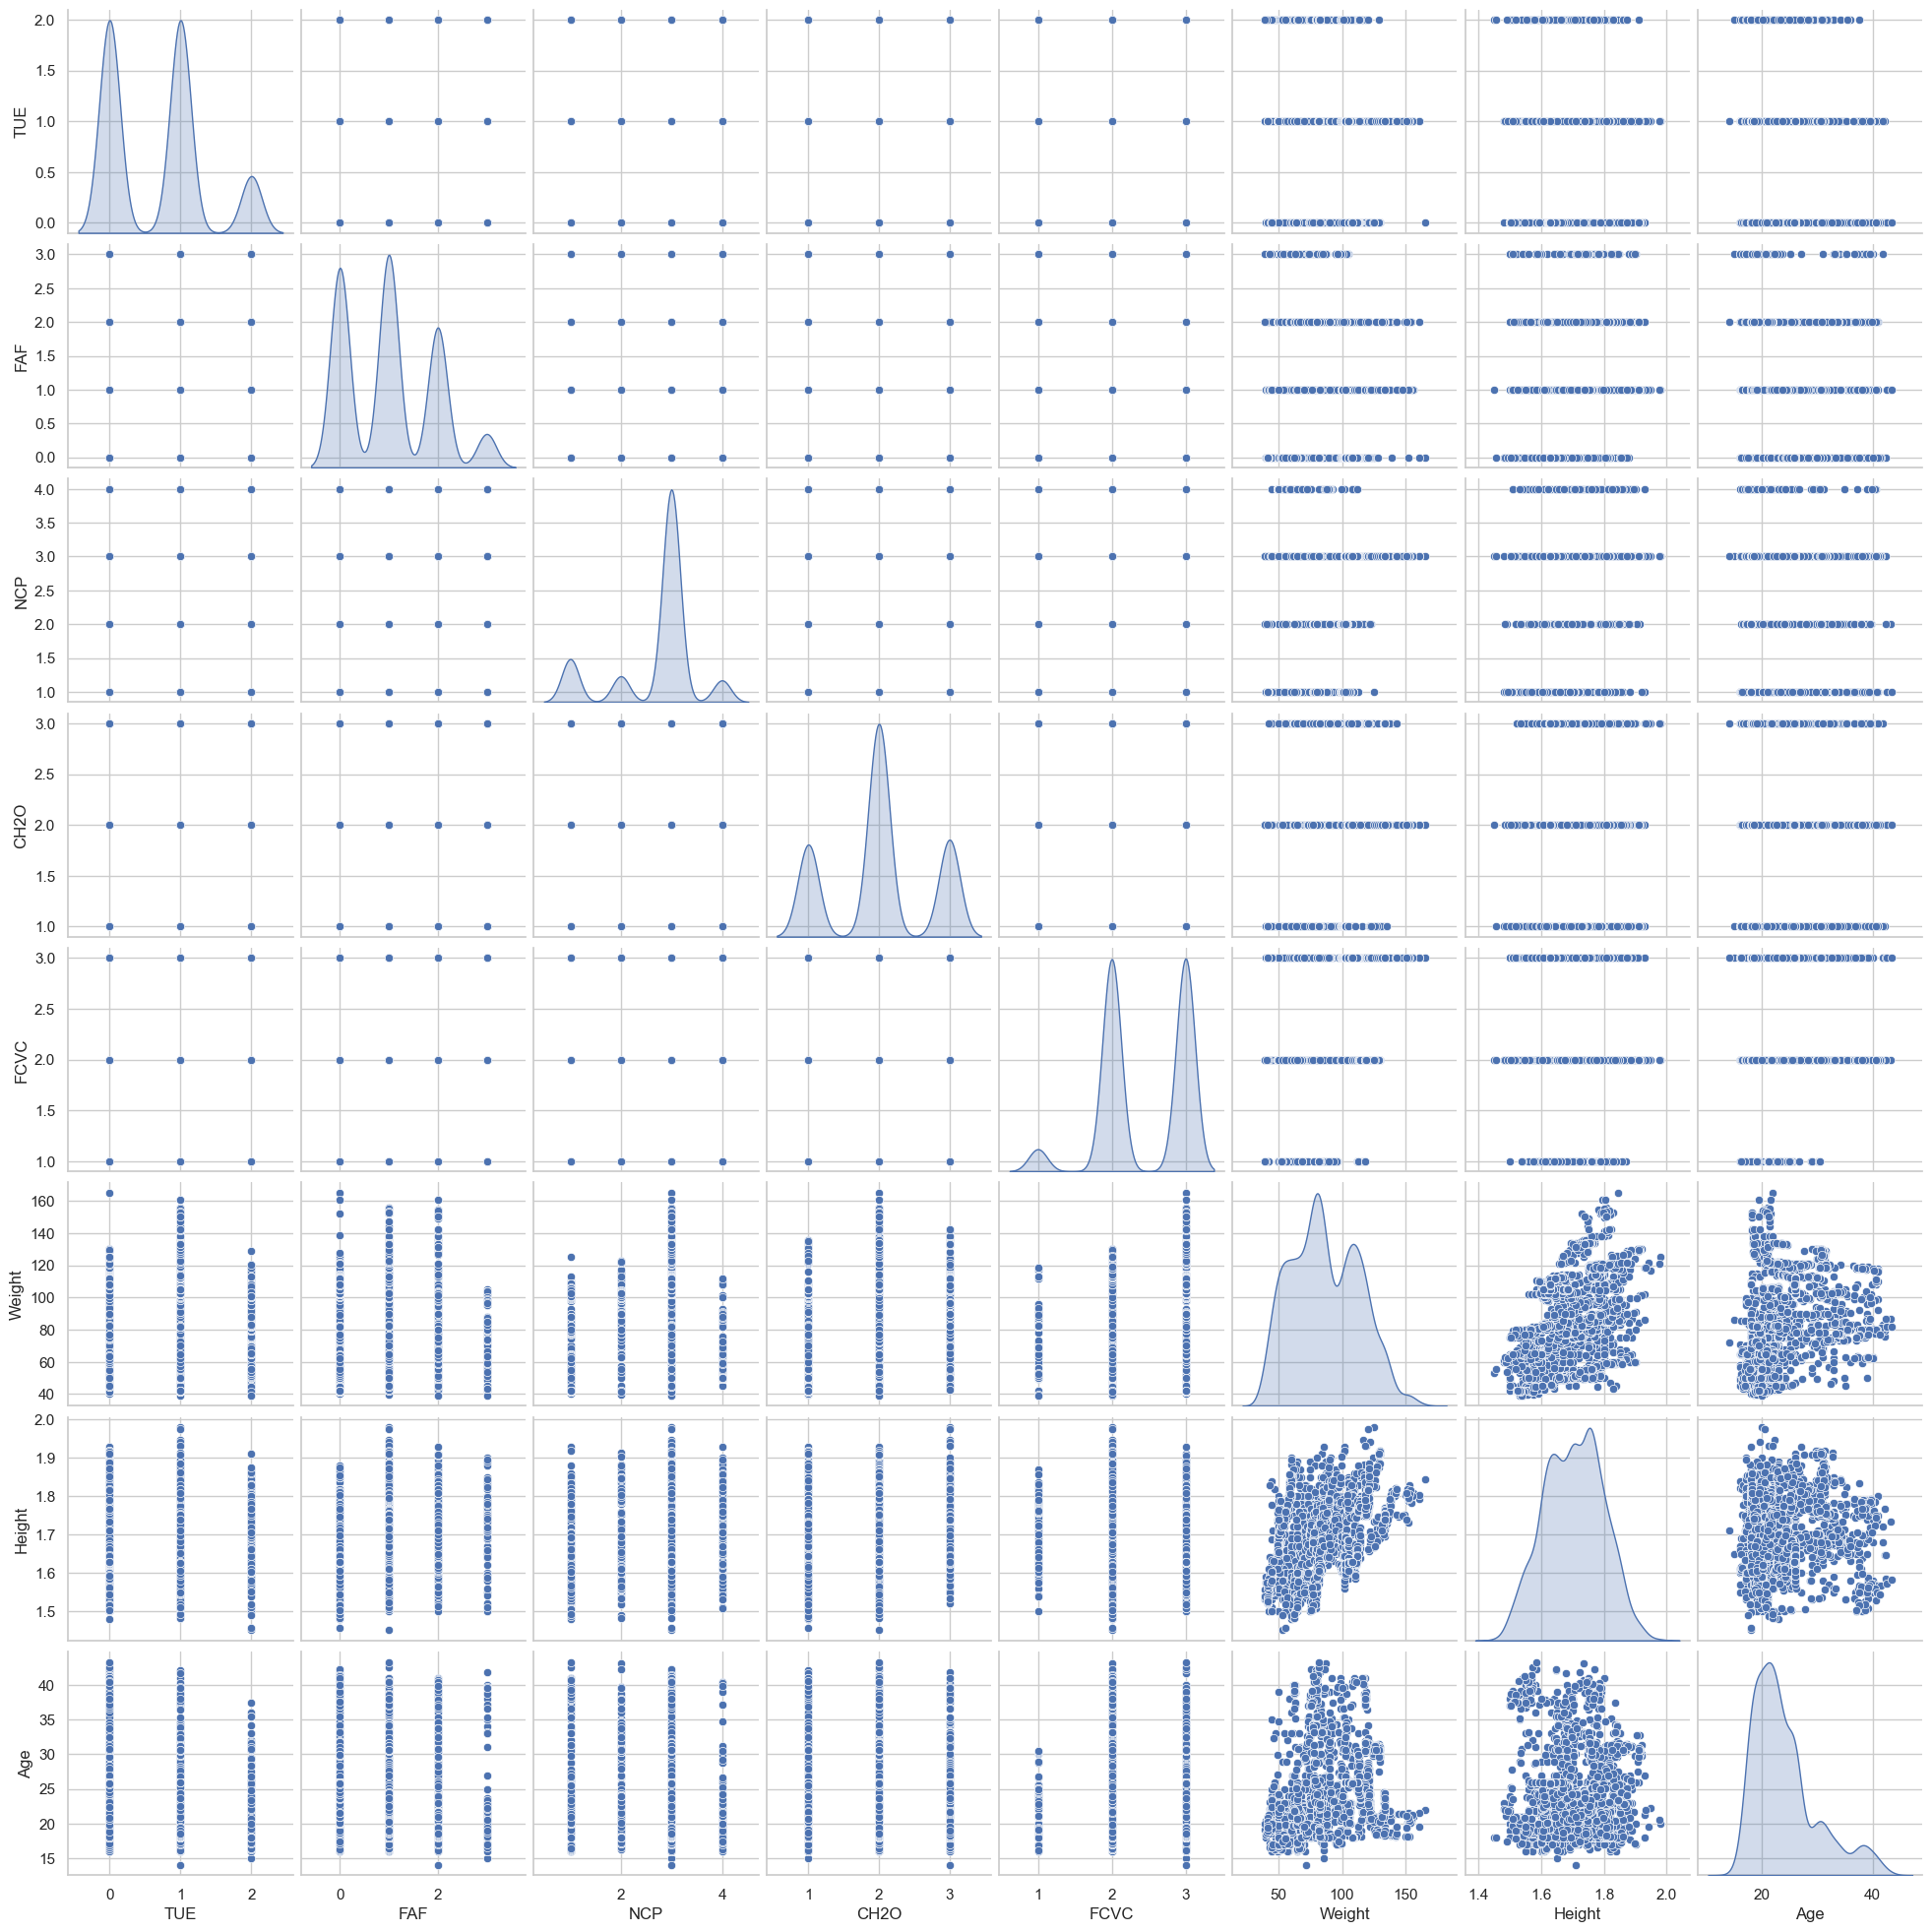

In [110]:
sns.pairplot(df_cleaned[numeric_columns], diag_kind='kde') 
plt.show()

<Axes: >

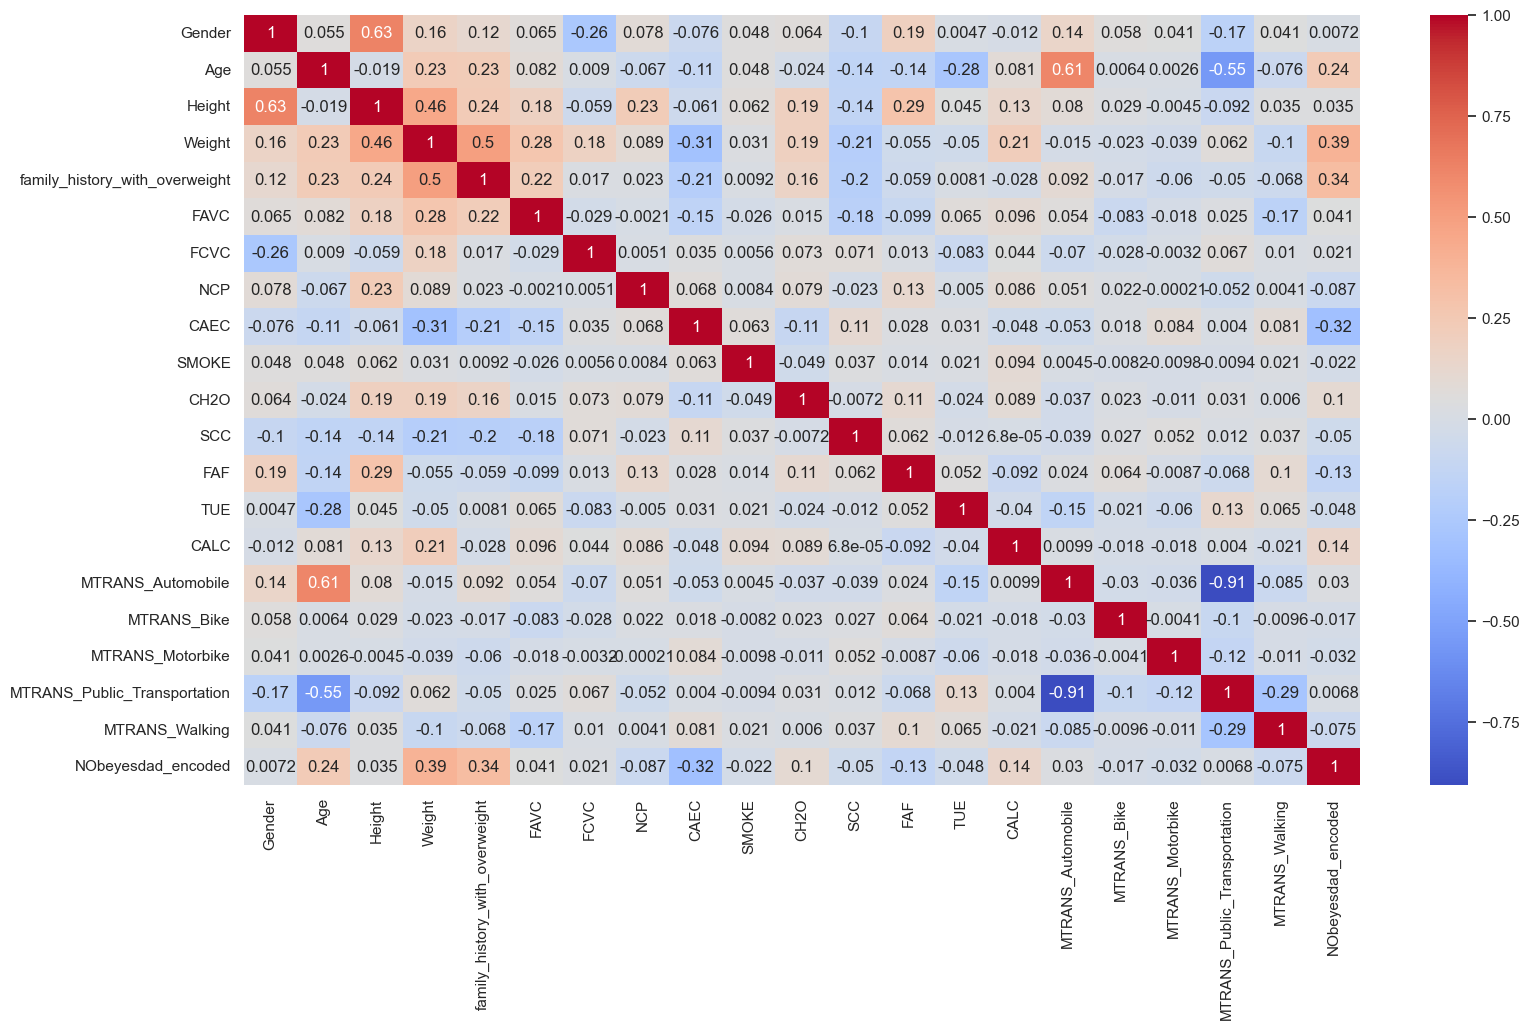

In [111]:
plt.figure(figsize=(18,10))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm')

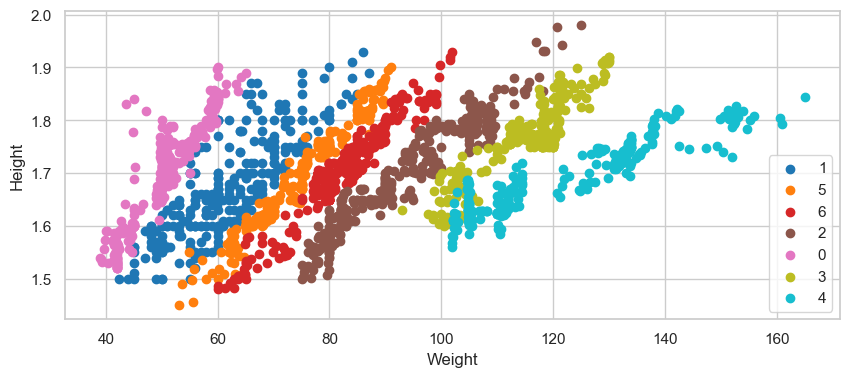

In [112]:
classes = df_cleaned['NObeyesdad_encoded'].unique()
colors = plt.cm.get_cmap('tab10', len(classes))

for i, class_label in enumerate(classes):
    subset = df_cleaned[df_cleaned['NObeyesdad_encoded'] == class_label]
    plt.scatter(subset['Weight'], subset['Height'], label=class_label, color=colors(i))
    plt.legend()
    plt.xlabel('Weight')
    plt.ylabel('Height')

In [113]:
X,y = df_cleaned.drop(['NObeyesdad_encoded'], axis=1), df_cleaned['NObeyesdad_encoded'].copy()

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [116]:
X_test_scaled.shape, y_test.shape, X_train_scaled.shape, y_train.shape

((413, 20), (413,), (1650, 20), (1650,))

In [117]:
rnd_clf = RandomForestClassifier(random_state=42)
svc = SVC(random_state=42)
log_reg = LogisticRegression(multi_class='multinomial', random_state=42)


models = [rnd_clf, svc, log_reg]
results = list()

for model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    results.append({
        "Model": model.__class__.__name__,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

metrics_df_test = pd.DataFrame(results)
metrics_df_test

,Model,Accuracy,Precision,Recall,F1 Score
0,RandomForestClassifier,0.958838,0.960223,0.953918,0.956021
1,SVC,0.861985,0.854362,0.849786,0.851264
2,LogisticRegression,0.883777,0.873806,0.877454,0.871728


In [118]:
rnd_clf.fit(X_train_scaled, y_train)
y_pred = rnd_clf.predict(X_test_scaled)

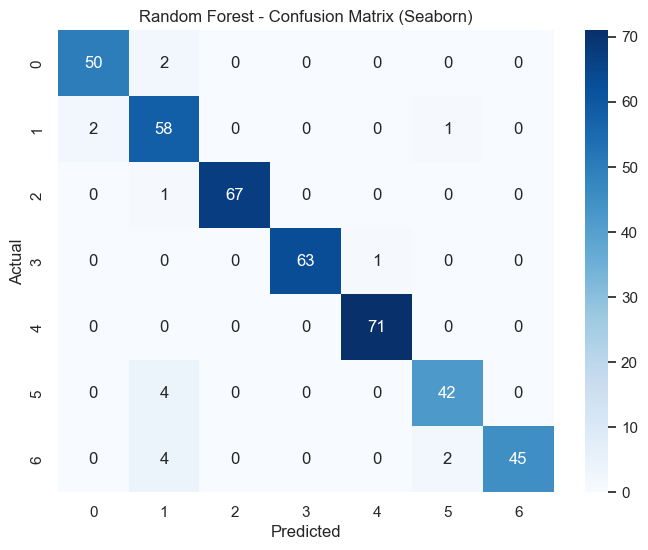

In [119]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest - Confusion Matrix (Seaborn)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

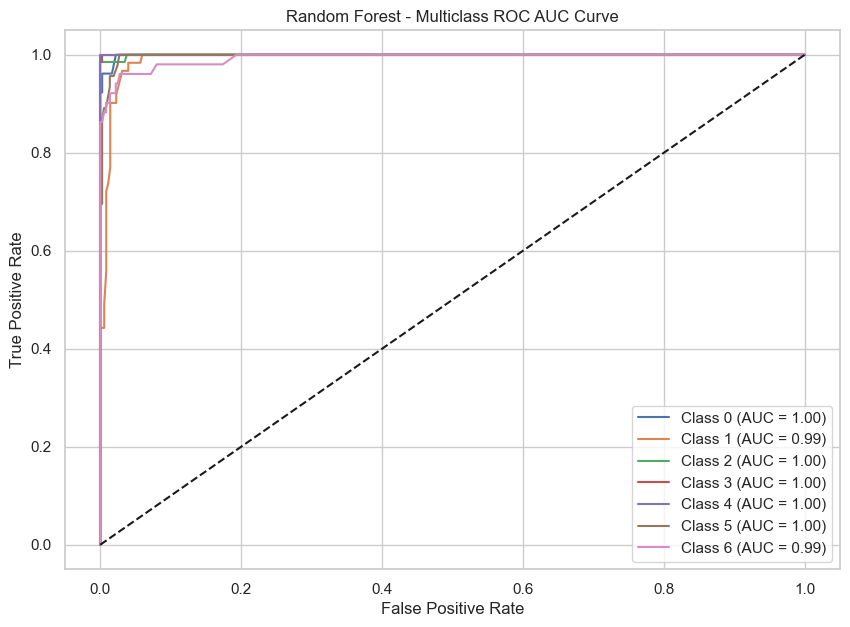

In [120]:
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

y_score = rnd_clf.predict_proba(X_test_scaled)

plt.figure(figsize=(10, 7))

for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {classes[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest - Multiclass ROC AUC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [121]:
joblib.dump(rnd_clf, 'random_forest_model.joblib')
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']